In [41]:
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
from run_training import run_training
from torch.utils.tensorboard import SummaryWriter


<class 'torch.Tensor'>
torch.Size([1, 512, 512])


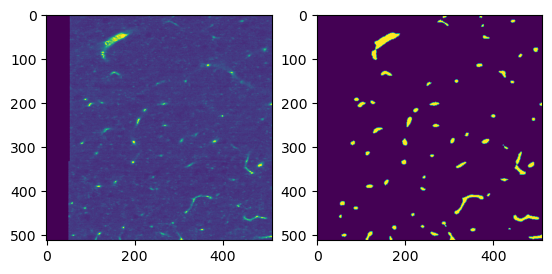

In [42]:
train_filepath = "train"
train_dataset = AngioDataset(train_filepath)

train_dataset_raw = train_dataset[0][0]
train_dataset_mask = train_dataset[0][1]

print(type(train_dataset_raw))
print(train_dataset_raw.shape)

fig, ax = plt.subplots(1,2)

ax[0].imshow(train_dataset_raw[0,:,:])
ax[1].imshow(train_dataset_mask[0,:,:])


In [43]:
# Sorensen Dice Coefficient implemented in torch
# the coefficient takes values in two discrete arrays
# with values in {0, 1}, and produces a score in [0, 1]
# where 0 is the worst score, 1 is the best score
class DiceCoefficient(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.eps = eps

    # the dice coefficient of two sets represented as vectors a, b can be
    # computed as (2 *|a b| / (a^2 + b^2))
    def forward(self, prediction, target):
        intersection = torch.sum(prediction*target)
        union = torch.sum(prediction)+torch.sum(target)
        return 2 * intersection / union.clamp(min=self.eps)

In [44]:
val_filepath = "val"
val_dataset = AngioDataset(val_filepath)
print(len(val_dataset))



24


In [45]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2)


In [46]:
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")

In [47]:
model = UNet(in_channels=1, out_channels=1, depth=4).to(device)
loss_function = nn.MSELoss()
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

n_epochs = 5
dice = DiceCoefficient()
logger = SummaryWriter("runs")
log_interval=1


In [49]:
run_training(model, optimizer, dice, n_epochs,
             train_loader, val_loader, loss_function, log_interval, logger, device=device)

RuntimeError: GET was unable to find an engine to execute this computation